# Dados
## Kaggle
 - [https://www.kaggle.com/mchirico/montcoalert](https://www.kaggle.com/mchirico/montcoalert)

## Configurações

#### Import pandas e numpy

In [1]:
import pandas as pd

#### Import dataset 911

In [10]:
df = pd.read_csv('../datasets/911.csv')

## Apresentação
#### Verifique o info()

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   lat        663522 non-null  float64       
 1   lng        663522 non-null  float64       
 2   desc       663522 non-null  object        
 3   zip        583323 non-null  float64       
 4   title      663522 non-null  object        
 5   timeStamp  663522 non-null  datetime64[ns]
 6   twp        663229 non-null  object        
 7   addr       663522 non-null  object        
 8   e          663522 non-null  int64         
 9   reason     663522 non-null  object        
 10  dayOfWeek  663522 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 40.5+ MB


#### Verifique o cabecalho

In [102]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,dayOfWeek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,Thu


## Perguntas básicas

#### Quais são os top 5 CEPs do dataset

In [103]:
df['zip'].value_counts().head()

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

#### Quais são os top 5 municípios do dataset

In [104]:
df['twp'].value_counts().head()

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

#### Na coluna `title` quantos códigos de títulos existem?

In [107]:
len(df['title'].unique())

148

In [108]:
df['title'].nunique()

148

## Criando colunas

#### Usando _apply_ e _lambda_, realize a quebra dos valores da coluna `title`

Por exemplo, para o valor ```EMS: BACK PAINS/INJURY``` a _razão_ (`reason`) é **EMS** e o _departamento_ (`department`) é **BACK PAINS/INJURY**

In [13]:
df['reason'] = df['title'].apply(lambda x: x.split(':')[0])

#### Qual é a razão mais comuns para as chamadas

In [19]:
df.reason.value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: reason, dtype: int64

#### Plot um gráfico de barras das razões

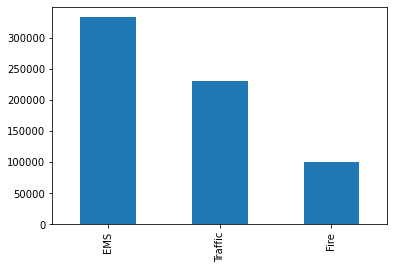

In [131]:
df.reason.value_counts().plot.bar()

## Coluna de tempo

#### Qual é o tipo de dado da coluna `timeStamp`

In [111]:
df[['timeStamp']].dtypes

timeStamp    datetime64[ns]
dtype: object

#### Utilize `pd.to_datetime` para converter a coluna de estring para DateTime

In [42]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

#### Imprima o ano, o mês e o dia da primeira instância

```
df['timeStamp'].loc[0].year
df['timeStamp'].loc[0].month
df['timeStamp'].loc[0].day
```

#### Usando _apply_, crie as colunas `hour`, `month`, `dayOfWeek`

In [112]:
df['hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['month'] = df['timeStamp'].apply(lambda x: x.month)
df['dayOfWeek'] = df['timeStamp'].apply(lambda x: x.dayofweek)

#### Utilize `value_counts` em `dayOfWeek`

In [52]:
df['dayOfWeek'].value_counts()

4    102942
2     99157
3     98683
1     97684
0     96745
5     89452
6     78859
Name: dayOfWeek, dtype: int64

#### Substitua o `dayOfWeek` pelos valores do mapa abaixo

```py
daymap = {
    0: 'Mon',
    1: 'Tue',
    2: 'Wed',
    3: 'Thu',
    4: 'Fri',
    5: 'Sat',
    6: 'Sun'
}
```

> Utilize a função `map` de Series

In [113]:
daymap = {
    0: 'Mon',
    1: 'Tue',
    2: 'Wed',
    3: 'Thu',
    4: 'Fri',
    5: 'Sat',
    6: 'Sun'
}

df['dayOfWeek'] = df['dayOfWeek'].map(daymap)

## Agrupando linhas

#### Utilize `groupby` e `count` para criar um novo DataFrame chamado `byMonth`

In [142]:
byMonth = df.groupby('month').count()

#### Plote o gráfico de `byMonth`

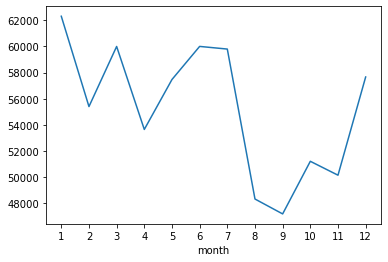

In [150]:
ax = byMonth['twp'].plot()
ax = ax.set_xticks([i+1 for i in range(12)])

#### Crie uma coluna chamada `date` a partir do `timeStamp`

In [156]:
df['date'] = df['timeStamp'].apply(lambda x: x.date())

In [157]:
df['date']

0         2015-12-10
1         2015-12-10
2         2015-12-10
3         2015-12-10
4         2015-12-10
             ...    
663517    2020-07-29
663518    2020-07-29
663519    2020-07-29
663520    2020-07-29
663521    2020-07-29
Name: date, Length: 663522, dtype: object

#### Utilize groupby e count em `date` e realize o plot

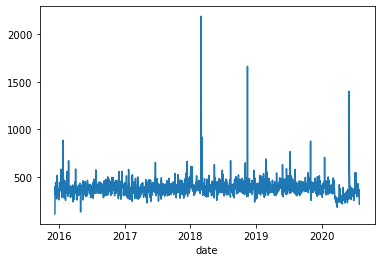

In [167]:
df.groupby('date').count()['twp'].plot()

#### Recrie o mesmo plot para cada `reason` diferente

EMS


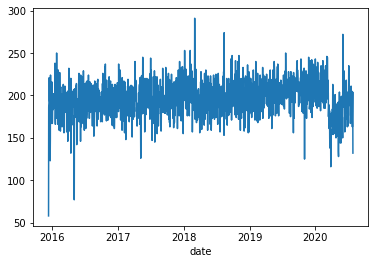

In [175]:
print(df['reason'].unique()[0])
df[df['reason'] == df['reason'].unique()[0]].groupby('date').count()['twp'].plot()

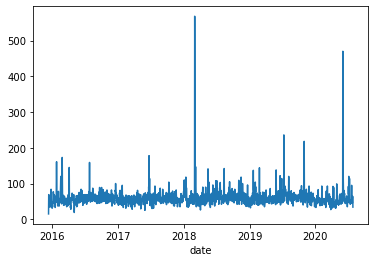

In [172]:
print(df['reason'].unique()[1])
df[df['reason'] == df['reason'].unique()[1]].groupby('date').count()['twp'].plot()

Traffic


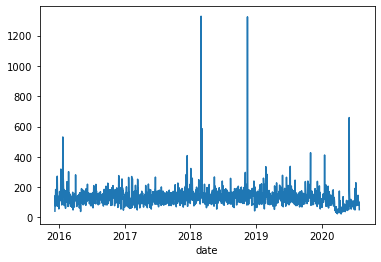

In [174]:
print(df['reason'].unique()[2])
df[df['reason'] == df['reason'].unique()[2]].groupby('date').count()['twp'].plot()

#### Crie um gráfico de barras agrupando as colunas `reason` e `dayOfWeek`

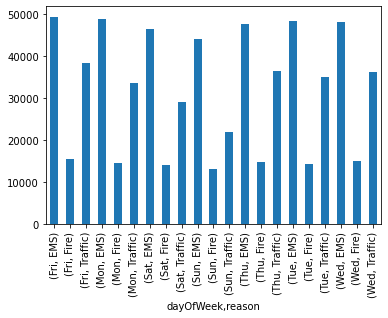

In [184]:
df.groupby(by=['dayOfWeek', 'reason']).count()['lat'].plot.bar()

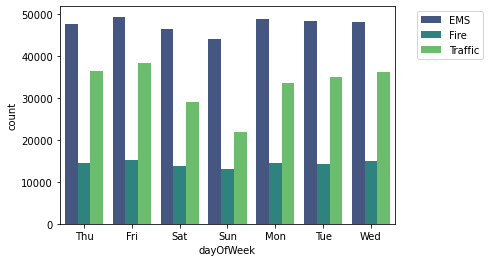

In [121]:
import seaborn as sns

ax = sns.countplot(x='dayOfWeek', data=df, hue='reason', palette='viridis')
ax = ax.legend(bbox_to_anchor=(1.05, 1), loc='best')

#### Crie um gráfico de barras com as colunas `reason` e `hour`

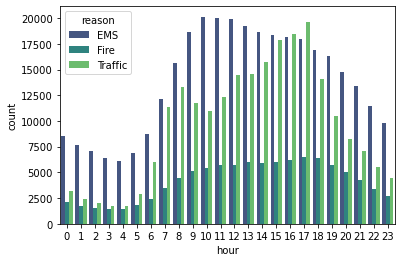

In [117]:
import seaborn as sns

ax = sns.countplot(x='hour', data=df, hue='reason', palette='viridis')

#### Crie um gráfico de barras com as colunas `reason` e `year`

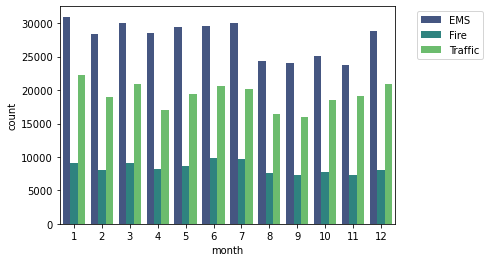

In [120]:
import seaborn as sns

ax = sns.countplot(x='month', data=df, hue='reason', palette='viridis')
ax = ax.legend(bbox_to_anchor=(1.05, 1), loc='best')

#### Use seaborn para criar um heatmap entre `dayOfWeek` e `hour`

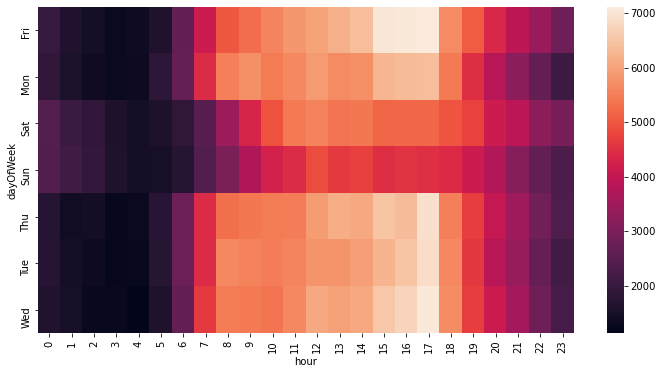

In [216]:
dayHour = df.groupby(by=['dayOfWeek', 'hour']).count()['lat'].unstack()
ax = sns.heatmap(dayHour)
ax.figure.set_size_inches(12, 6)